In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Gender Comparisation')

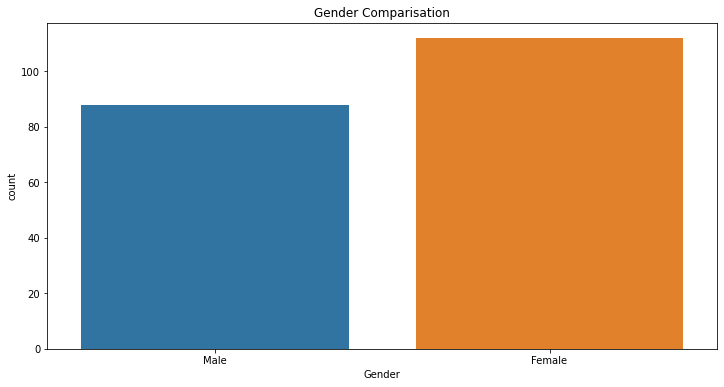

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Comparisation')


In [ ]:
# From the above barplot, we observe that the number of females is higher than the males.

<AxesSubplot:xlabel='Age', ylabel='Count'>

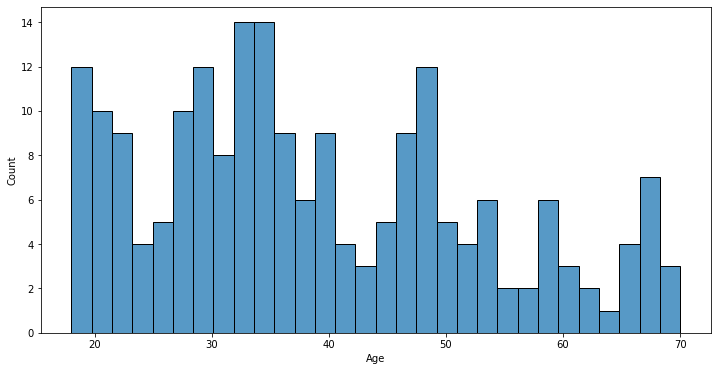

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(x='Age', bins=30, data=df)

<AxesSubplot:xlabel='Age'>

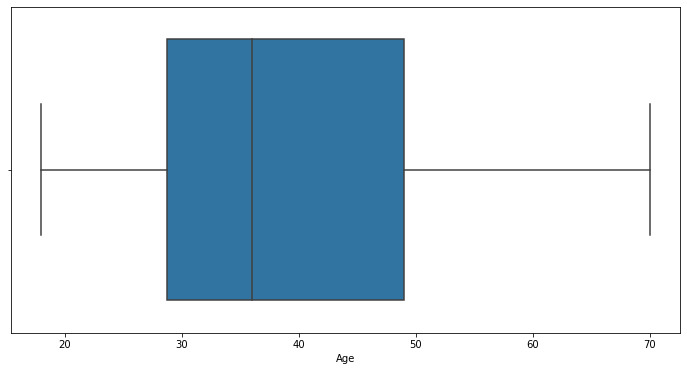

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age',data=df)

In [ ]:
# From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. 
# The minimum age of customers is 18, whereas,the maximum age is 70.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

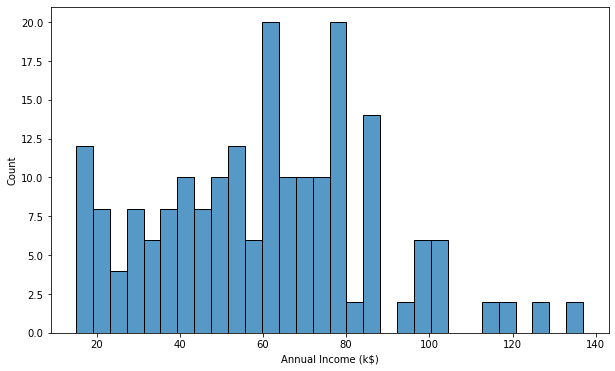

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['Annual Income (k$)'],bins=30,kde=False)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

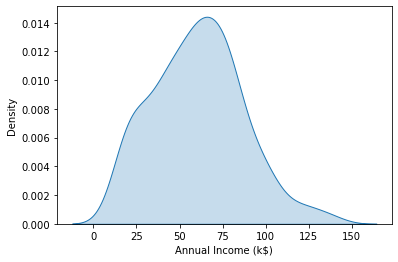

In [11]:
sns.kdeplot(x='Annual Income (k$)',data=df,shade='y')

In [ ]:
# From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income
# is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average 
# salary of all the customers is 60.56. In the Kernel Density Plot that we displayed above, we observe that the annual income has 
# a normal distribution.

<AxesSubplot:xlabel='Spending Score (1-100)'>

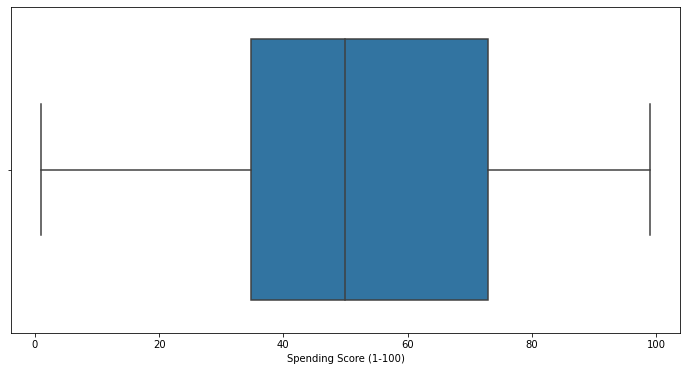

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

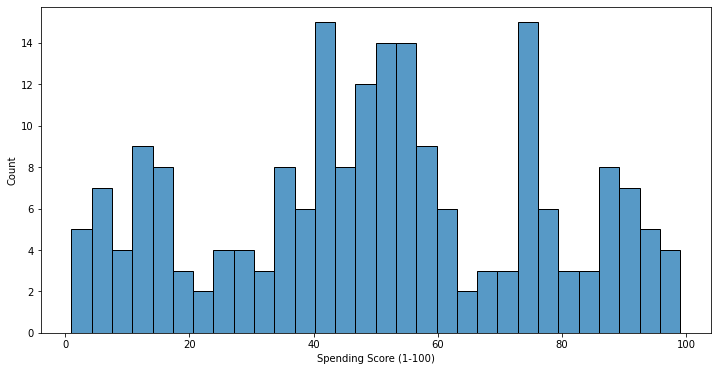

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(df['Spending Score (1-100)'],bins=30,kde=False)

In [ ]:
#The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score 
# is that Min is 1, Max is 99 and avg.is 50.20. From the histogram, we conclude that customers between class 40 and 50 have the 
# highest spending score among all the classes.

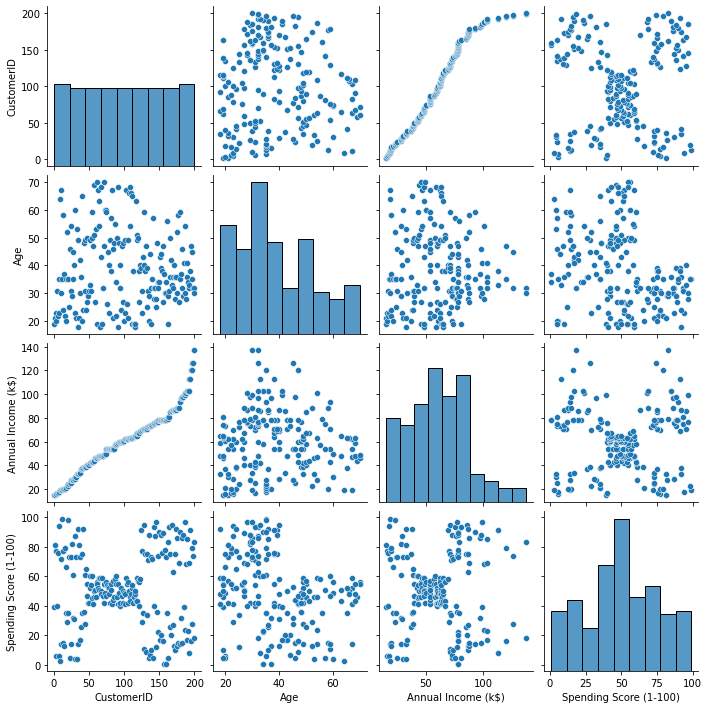

In [14]:
sns.pairplot(df)

In [15]:
from sklearn.cluster import KMeans

In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
def G(value):
    if value == "Male":
        return 1
    else:
        return 0

In [18]:
df['Gender1'] = df['Gender'].apply(G)

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender1
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [ ]:
# Determination of K value.

In [20]:
sum_of_sq_distance = []
p = range(1,10)
for k in p:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']])
    sum_of_sq_distance.append(km.inertia_)
    
    

C:\Users\debas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
sum_of_sq_distance

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556198,
 75378.76464074483,
 58300.44332159069,
 51116.986944634315,
 44344.94980177717,
 40631.6369510806]

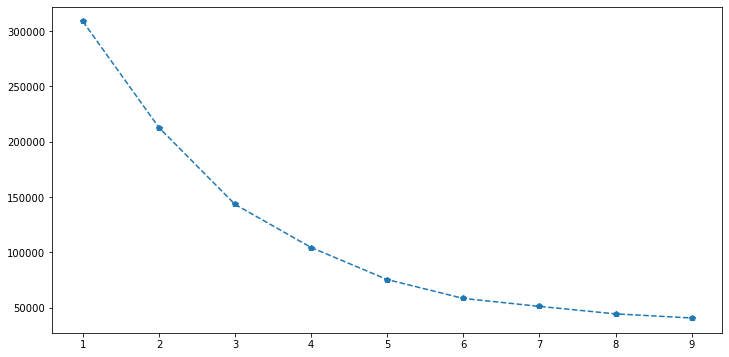

In [22]:
fig = plt.figure(figsize=(12,6))
plt.plot(p,sum_of_sq_distance, 'p--')

In [27]:
kmeans = KMeans(n_clusters=6)

In [28]:
kmeans.fit(df.drop('Gender',axis=1))

KMeans(n_clusters=6)

In [29]:
kmeans.cluster_centers_

array([[110.18604651,  38.69767442,  64.06976744,  51.06976744,
          0.41860465],
       [ 24.        ,  25.52173913,  26.30434783,  78.56521739,
          0.39130435],
       [166.82352941,  32.26470588,  88.88235294,  82.76470588,
          0.44117647],
       [164.88571429,  41.25714286,  88.37142857,  17.42857143,
          0.54285714],
       [ 23.        ,  45.2173913 ,  26.30434783,  20.91304348,
          0.39130435],
       [ 67.57142857,  46.14285714,  48.38095238,  50.76190476,
          0.42857143]])

In [30]:
kmeans.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0,
       0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

C:\Users\debas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

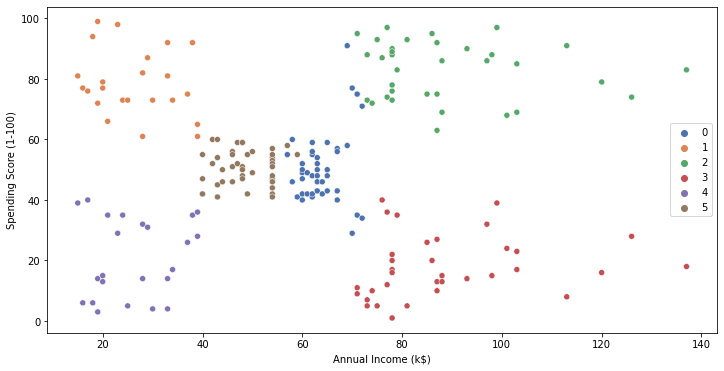

In [35]:
fig= plt.figure(figsize=(12,6))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue= kmeans.labels_, cmap='coolworm',palette="deep")


In [38]:
# Cluster 0 and 5 - These clusters represent the customer_data with the medium income salary as well as the medium annual spend of salary.
# Cluster 1 -  This cluster denotes a low annual income and high yearly spend.
# Cluster 2 - This cluster denotes the customer_data with high annual income as well as high yearly spend of income.
# Cluster 3 - This cluster represents a high annual income but its low yearly expenditure.
# Cluster 4 - This cluster denotes the customer_data with low annual income as well as low yearly spend of income.
